In [1]:
import sys
print(sys.version)

3.9.12 (main, Jun  1 2022, 11:38:51) 
[GCC 7.5.0]


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import os
import csv
import random

import cv2
import imutils

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [3]:
folder = '../../Dane/Baza_aktorzy_przerobiona/'
folder_docelowy = '../../Dane/Baza_aktorzy_przeplatane/'
slesh = '/'
png = '.png'

In [4]:
people = []
for i in range(1,7):
    images = []
    for j in range(19):
        im = Image.open(folder+str(i)+slesh+str(j)+png)
        arr_im = np.array(im) 
        images.append(arr_im) 
    people.append(images)

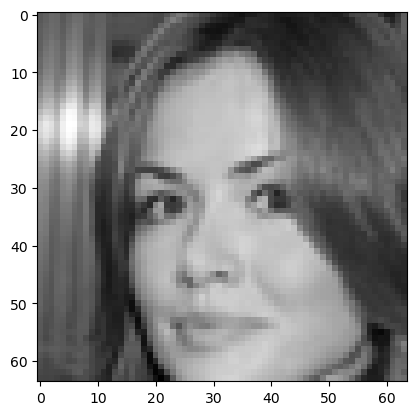

In [5]:
plt.imshow(people[0][4], cmap = 'gray')

In [18]:
h, w = 128, 64
data = np.zeros((h, w), dtype=np.uint8)

#Laczna ilosc zdjec
lacznie = 2052

ilosc = 6
rozmiar = 19
poloczone = []
n = 0

# Inicjalizacja tablicy zerami o rozmiarze 'rozmiar'
tab = np.zeros(lacznie, dtype=np.uint8)


#Stworzenie nowego katalogu
newpath = folder_docelowy
if not os.path.exists(newpath):
    os.makedirs(newpath)

#Petla przechodzi po ludziach
for i in range(ilosc):
    #Petla przechodzi po zdjeciach
    m = rozmiar
    
    for j in range(rozmiar):       
        m = m - 1
        
        for k in range(m):
                 
            a = 0
            
            #Pętla służy do przeplatania wierszy zdjęć
            for p in range(len(people[i][j])):
                p = 2*p
                data[p] = people[i][j][a]
                data[p+1] = people[i][rozmiar-1-k][a]
                a = a + 1
    
            #Zapisanie zmienionego zdjecia
            con = Image.fromarray(data)
            con.save(folder_docelowy+str(n)+png) 
      
            poloczone.append(con)
            tab[n] = 1
            n = n + 1

In [21]:
#Tworzenie próbek negatywnych
h, w = 128, 64

x = 0 #Licznik 

m = 7
rozne = []


for i in range(len(people[0])):
    
    for j in range(1,len(people)):   
        
         for k in range(len(people[0])):
    
            
                a = 0
                data = np.zeros((h, w), dtype=np.uint8)

                #Pętla służy do przeplatania wierszy zdjęć
                for p in range(w):
                    p = 2*p
                    data[p] = people[0][i][a]
                    data[p+1] = people[j][k][a]
                    a = a + 1
            
                con = Image.fromarray(data)
                            
                x = x + 1
                rozne.append(con)
print(x)

1805


In [22]:
for i in range(lacznie - n):
    
    rand_1 = random.randint(0,x-1)
    
    con = rozne[rand_1]
    
    con.save(folder_docelowy+str(n)+png) 
    
    poloczone.append(con)
    
    tab[n] = 0
    n = n + 1
    
print(n)

2052


In [23]:
#Zapis tablicy do pliku CSV
tab.tofile(folder_docelowy+'aktorzy.csv', sep = ' ')   

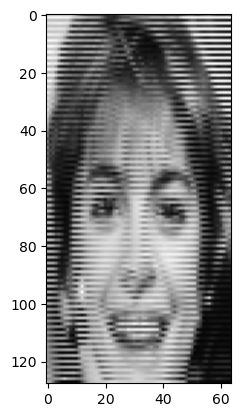

In [24]:
plt.imshow(poloczone[450], cmap = 'gray')